In [1]:
from IPython.display import Image

# 생성모델과 판별모델

오늘은 생성 모델링 (Generative Modeling) 이라는, 지금까지 배웠던 것들과는 조금 색다른 주제를 배워볼 예정입니다.

생성 모델링을 직접 다뤄보기 전에, 생성 모델링은 무엇이고 어떤 것을 목표로 하는 것인지, 그리고 주요 생성 모델링 기법에는 무엇이 있는지 먼저 살펴보며 시작하겠습니다.

생성 모델링은 지금까지 접해 보았던 기본적인 딥러닝 모델들과는 사뭇 다릅니다.

무엇이 다른 걸까요? 자, 우리가 이전에 배웠던 여러 이미지 또는 자연어 처리 모델을 떠올려 봅시다. 
인공지능과 가위바위보 하기 프로젝트에서는 우리가 직접 가위, 바위, 보에 해당하는 사진을 찍어 데이터셋을 만들고, 각 이미지를 알맞은 카테고리로 분류 할 수 있도록 학습시켰습니다. 

이러한 모델을 우리는 판별 모델링 (Discriminative Modeling) 이라고 부릅니다. 말 그대로 입력받은 데이터를 어떤 기준에 대해 판별하는 것이 목표인 모델링이죠.

반면, 오늘 배워 볼 생성 모델링은 말 그대로 없던 데이터를 생성해 내는 것이 목표입니다. 

가위바위보 프로젝트로 대입해 본다면 다양한 가위, 바위, 보가 담긴 데이터셋에서 각 이미지의 특징을 학습해 그와 비슷한 새로운 사진을 만들어내야 하는 것이죠. 

물론 우리는 실제 사진과 거의 구별이 어려울 정도로 좋은 품질의 이미지를 만들어내는 것이 최종 목표입니다.

즉, 판별 모델과 생성 모델을 한 마디로 설명해 보자면

### - 판별 모델 : 입력된 데이터셋을 특정 기준에 따라 분류하거나, 특정 값을 맞추는 모델(ex. 가위바위보 데이터셋)


### - 생성 모델 : 학습한 데이터셋과 비슷하면서도 기존에는 없던 새로운 데이터셋을 생성하는 모델로 정리할 수 있습니다.

영상 =  https://youtu.be/XH2EbK9dQlg

# 영상 본 후 문제 풀어보기!!

Q1. 생성 모델링은 어떻게 응용하냐에 따라 다양한 것들을 생성해낼 수 있는 잠재력이 큰 분야입니다. 무언가를 생성하는 이런 인공지능 기술을 사용하면 어떤 것들이 가능할까요? 다양하게 상상해 보고, 세 가지를 적어 보세요.

    A)  - 생성 모델로 다른 판별 모델을 학습시키는 데에 필요한 데이터를 만들어낸다.   

    
        - 베토벤의 음악을 학습한 후, 그와 비슷한 분위기의 새로운 음악을 만들어낸다.

        - 글을 생성하는 방법을 학습한 모델로 기사 또는 소설 등을 창작해낸다.

        - 여러 사람의 얼굴을 학습해서 세상에 없는 사람 얼굴을 만들어낸다.


Q2. 영상의 초반부에 소개된, 생성 모델로 기존의 디자인을 개선한 예 세 가지는 무엇인가요?

    A)  - 안테나의 구조, 우주 탐사선, 모형 치아


Q3. 영상에서는 간단한 피아노 선율만을 입력하면 기타, 드럼, 베이스 등의 다른 악기 모두가 어울리는 복합 음악을 만들어내는 DeepComposer를 시연하였습니다. 이 생성 모델에는 두 가지 네트워크가 사용되었다고 했는데요, 그 두 가지는 무엇인가요?

    A)  - Generator(생성자), Discriminator(판별자)


Q4. DeepComposer의 생성자(Generator)와 판별자(Discriminator)는 각각 무엇에 비유되었나요? 그 비유의 의미는 무엇인가요?


    A)  - 생성자가 오케스트라처럼 직접 음악을 연주하여 만들어내는 모델이라면, 판별자는 오케스트라가 연주한 음악을 평가하여 오케스트라가 만들어 내는 음악이 점점 더 좋아지게 만드는 지휘자의 역할을 하는 모델이라는 의미입니다.





Generator가 일관되게 생성자로 번역되는 것에 비해, Discriminator는 번역자에 따라 판별자 또는 구분자 등으로 다양하게 번역되는 경향을 보입니다. 여기서는 판별자라는 번역을 선택합니다.

음악을 생성하는 DeepComposer 외에도 지금까지 연구된 생성 모델에는 간단한 모델에서부터 아주 복잡한 모델까지 매우 다양합니다.

오늘의 실습은 간단한 생성 모델만 다뤄볼 예정이지만 앞으로 차근차근 복잡한 모델들을 만나게 될 것입니다.

방금 봤던 DeepComposer처럼 생성 모델에는 재미있는 기술들이 많은데요, 오늘은 이미지를 다루는 실습을 할 예정이므로 이미지와 관련된 응용 생성 모델 기법들만 살짝 살펴보고 가겠습니다. 

Pix2Pix는 간단한 이미지를 입력할 경우 실제 사진처럼 보이도록 바꿔줄 때 많이 사용되는 모델입니다.

모델은 아래 그림처럼 단순화된 이미지(Input Image) 와 실제 이미지(Ground Truth) 가 쌍을 이루는 데이터셋으로 학습을 진행합니다.

왼쪽의 Input Image를 입력받으면, 내부 연산을 통해 실제 사진 같은 형상으로 변환된 Predicted Image를 출력하는 거죠. 

학습 초기에는 모델이 생성한 Predicted Image가 Ground Truth image와 많이 다르겠지만, 계속해서 Ground Truth와 얼마나 비슷한지를 평가하며 점차 실제 같은 결과물을 만들어 내게 됩니다. 

이렇게 한 이미지를 다른 이미지로 픽셀 단위로 변환한다는 뜻의 Pixel to Pixel을 딴 Pix2Pix로 이름이 붙게 되었습니다.



![title](https://d3s0tskafalll9.cloudfront.net/media/images/pix2pix.max-800x600.png)


위의 예시를 보면 Input Image는 매우 단순화된 이미지이기 때문에 건물의 형태나 창문의 위치 등의 구조적인 정보는 알 수 있지만, 실제 세부적인 디자인이 어떻게 되어 있을지는 사람이라도 정확히 맞추기가 어렵습니다. 

그래서 Predicted Image에는 구조적인 정보를 바탕으로 건물 이미지를 만들며 그에 어울리는 세부 디자인을 생성하게 되죠. 그 결과물은 Ground Truth와 완벽하게 똑같지는 않지만, 전체적인 분위기는 비슷한 느낌을 받습니다.

이러한 Pix2Pix 기법이 응용될 수 있는 다른 사례들은 다음 논문에서 그림으로 확인해 볼 수 있습니다.


논문을 다 읽는 데에는 시간이 오래 걸리니, Experiments에 있는 이미지만 간단히 살펴보고 오시죠!

## 모네의 그림을 사진으로, 사진을 다시 모네의 그림으로: CycleGAN

Pix2Pix 이후 발전된 모델로는 CycleGAN 이 있습니다. 이름에서도 느껴지듯 이 모델은 한 이미지와 다른 이미지를 번갈아 가며 Cyclic하게 변환시킬 수 있습니다. (아래 이미지를 참고하세요)

언뜻 생각해 보면 그림을 사진으로 바꾸는 Pix2Pix와 비슷해 보이지만, 한 방향으로의 변환만 가능한 Pix2Pix와 달리 CycleGAN은 양방향으로의 이미지 변환이 가능합니다. 즉, 실사 이미지를 그림으로 바꾸는 것과 그림을 실사 이미지로 바꾸는 것 두 가지가 모두 가능한 거죠.

또한 그림과 사진의 쌍으로 이루어진 데이터셋이 필요했던 Pix2Pix와 달리, CycleGAN은 쌍이 필요 없습니다. 

다음과 같이 얼룩말을 그냥 말로, 말을 얼룩말로 서로 변환할 경우 쌍을 이루지 않더라도 그냥 얼룩말이 있는 사진과 말이 있는 사진 각각의 데이터셋만 있다면 CycleGAN을 학습시킬 수 있습니다. 

모델이 스스로 얼룩말과 말 데이터에서 각각의 스타일을 학습해서 새로운 이미지에 그 스타일을 입힐 수 있도록 설계되었기 때문이죠. 딥러닝에서 쌍으로 된 데이터(paired data)가 필요 없다는 것은 데이터를 구하기 훨씬 쉽고, 라벨을 붙이는 주석(annotation) 비용이 필요 없다는 것을 뜻하니, 굉장히 큰 장점이라고 할 수 있겠죠!

![title](https://d3s0tskafalll9.cloudfront.net/media/images/CycleGAN.max-800x600.png)


CycleGAN의 또 다른 유명한 활용 사례는 바로 실제 사진을 모네 또는 고흐 같은 화가가 그린 그림처럼 바꾸는 것입니다.

다음과 같이 하나의 사진만으로도 모네가 그린 그림, 고흐가 그린 그림 등으로 마음대로 변환 시켜 볼 수 있는 거죠.

물론 CycleGAN이기 때문에 그림을 사진처럼 변환시키는 반대의 경우도 가능합니다! 정말 흥미롭지 않나요?!

![title](https://d3s0tskafalll9.cloudfront.net/media/images/CycleGAN2.max-800x600.jpg)

논문 : https://arxiv.org/pdf/1611.07004.pdf

논문 첫머리에서 소개된 Pix2Pix의 응용 사례

- 스케치로 그려진 그림을 실사화하기


- 흑백 사진을 컬러로 변환하기


- 위성사진을 지도 이미지로 변환하기


- 낮에 찍힌 사진을 밤 배경의 사진으로 변환하기

## pix2pix 와 CycleGAN의 차이점

- Pix2Pix는 한 방향으로의 변환만 가능하지만, CycleGAN은 양방향으로의 변환을 할 수 있다.     
- Pix2Pix는 입력 데이터와 출력 데이터끼리 쌍으로 이루어진 데이터셋이 필요하지만, CycleGAN은 필요 없다.

In [2]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.4.1


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_x, _), (test_x, _) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


In [5]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [6]:
train_x.shape

(60000, 28, 28)

In [7]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
train_x.shape

(60000, 28, 28, 1)

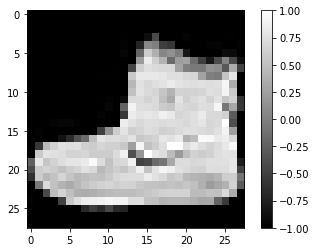

In [8]:
plt.imshow(train_x[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

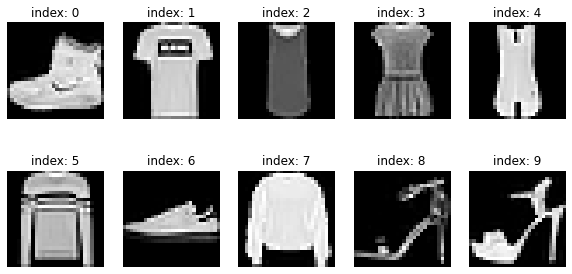

In [9]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i].reshape(28, 28), cmap='gray')
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

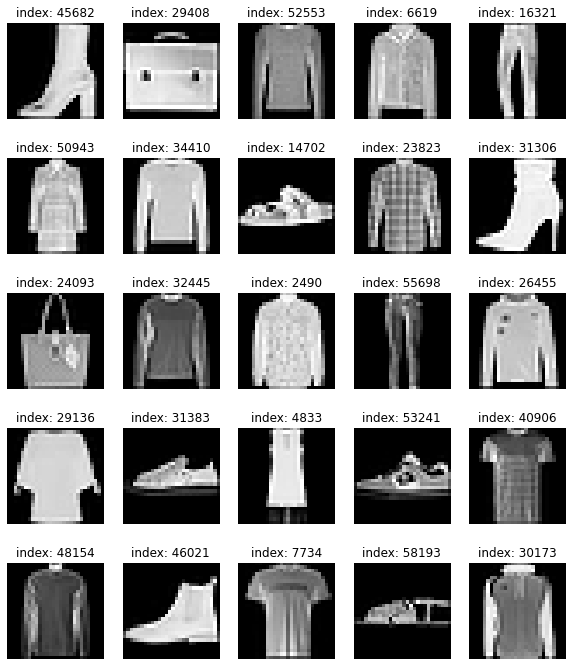

In [10]:
plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 60000)
    plt.imshow(train_x[random_index].reshape(28, 28), cmap='gray')
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

In [11]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [13]:
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((7, 7, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(1, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

In [14]:
generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

In [15]:
noise = tf.random.normal([1, 100])

In [16]:
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 28, 28, 1])

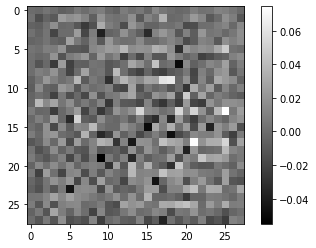

In [17]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.colorbar()
plt.show()

In [18]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

In [19]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [20]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00177702]], dtype=float32)>

In [21]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [22]:
vector = [[1, 2, 3],
          [4, 5, 6]]

tf.ones_like(vector)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)>

In [23]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [24]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [25]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

In [26]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [27]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

In [28]:
import numpy as np
import tensorflow as tf

def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([7, 7])

In [29]:
import numpy as np
import tensorflow as tf

@tf.function    # 위와 동일한 함수이지만 @tf.function 데코레이터가 적용되었습니다.
def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


<tf.Tensor: shape=(2,), dtype=int64, numpy=array([7, 7])>

In [30]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

In [31]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

In [32]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

In [33]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [34]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

In [35]:
save_every = 5
EPOCHS = 5

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

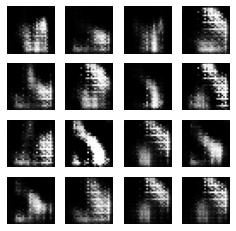

Time for training : 163 sec


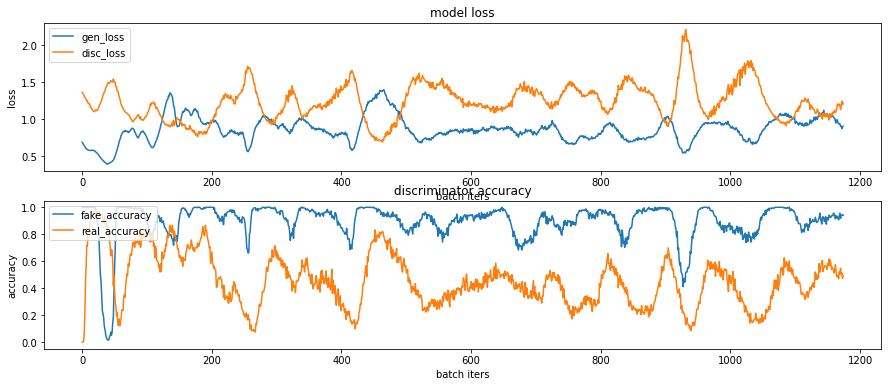

CPU times: user 55.2 s, sys: 8.42 s, total: 1min 3s
Wall time: 2min 43s


In [36]:
%%time
train(train_dataset, EPOCHS, save_every)
# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

# cifar-10 모델 실습하기

In [37]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.4.1


In [38]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

170500096/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

# Project

In [39]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.4.1


In [40]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

(50000, 32, 32, 3)

In [41]:
print(train_x.shape)
print(test_x.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [42]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [43]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


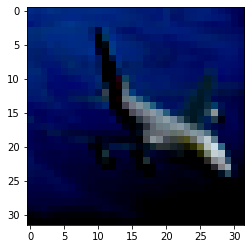

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


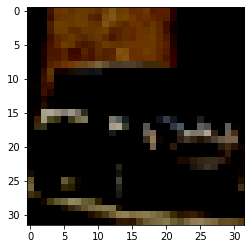

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


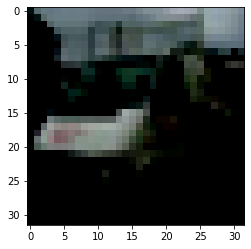

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


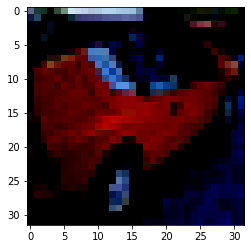

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


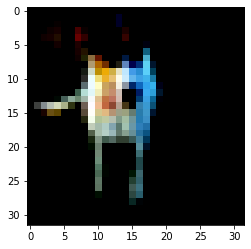

In [44]:
cand = np.random.randint(1, 50000, 5)
for i in cand:
    plt.imshow(train_x[i])
    plt.show()

**train_x 정규화**

In [45]:
print(f'min is {train_x[0].min()}, max is {train_x[0].max()}')
train_x = (train_x - 127.5) / 127.5
print(f'min ins {train_x[0].min()}, max is {train_x[0].max()}')

min is -1.0, max is 1.0
min ins -1.007843137254902, max is -0.9921568627450981


In [46]:
# BUFFER_SIZE는 전체 데이터를 섞기 위해 60000 (총 데이터 수와 같거나 크게 설정하는 것이 좋음)

BUFFER_SIZE = 50000
BATCH_SIZE = 256

In [47]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [48]:
def make_generator_model():
    
    print('start')

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((8, 8, 256)))

    # Third: Conv2DTranspose layerㅇㅇ
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    print('end')

    return model


In [49]:
generator = make_generator_model()

generator.summary()

start
end
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16384)             1638400   
_________________________________________________________________
batch_normalization_3 (Batch (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16384)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 8, 8, 128)         819200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 8, 8, 12

In [50]:
noise = tf.random.normal([1, 100])


In [51]:
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 32, 32, 3])

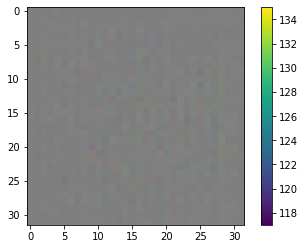

In [52]:
plt.imshow(tf.reshape(tf.dtypes.cast(generated_image * 127.5 + 127.5, tf.int64), [32,32,3]))
plt.colorbar()
plt.show()

In [53]:
def make_discriminator_model():
    
    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

In [54]:
discriminator = make_discriminator_model()

discriminator.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)             

In [55]:
decision = discriminator(generated_image, training=False)
decision


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.0019706]], dtype=float32)>

In [56]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)


In [57]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


In [58]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [59]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

In [60]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [61]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

In [62]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값


In [63]:
def generate_and_save_images(model, epoch, it, sample_seeds):
    
    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(tf.reshape(tf.dtypes.cast(predictions[i] * 127.5 + 127.5, tf.int64), [32,32,3]))
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

In [64]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/explorations/13_cifar10_dcgan/cifar10/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

In [65]:
checkpoint_dir = os.getenv('HOME')+'aiffel/dcgan_newimage/cifar10/training_history'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [66]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

In [67]:
save_every = 5
EPOCHS = 1000

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

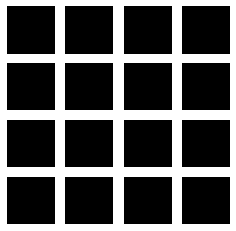

Epoch 876 | iter 1
Time for epoch 876 : 1 sec


In [ ]:
# %%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/explorations/13_cifar10_dcgan/cifar10/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.